# Participant ID:S06

### Content:
- Correlation matrix 
- Comfort Function implementation
- Weather Station Data (During Commuting)
- Weather Station Data (Day of Commuting from 8am to 6pm)
- Living Lab (Day of Commuting from 8am to 6pm)

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from datetime import datetime


In [2]:
## Read the CSV file into a DataFrame
S06_path = 'C:/Users/Tomar/dev/PCM_study/summer_2023/output/process_data/S06_final_df.csv'

S06_df = pd.read_csv(S06_path, index_col=False, parse_dates=['DateTime'])

In [3]:
S06_df.columns

Index(['DateTime', 'ID_instance', 'hrv_vlf', 'hrv_lf', 'hrv_hf', 'hrv_sdnn',
       'hrv_rmssd', 'hrv_mean_nni', 'hrv_median_nni', 'hrv_range_nni',
       'hrv_entropy', 'eda_tonic_mean', 'eda_tonic_std', 'eda_tonic_sum',
       'eda_tonic_energy', 'eda_phasic_mean', 'eda_phasic_std',
       'eda_phasic_sum', 'eda_phasic_energy', 'acc_acc_x_min', 'acc_acc_y_min',
       'acc_acc_z_min', 'acc_l2_min', 'acc_acc_x_max', 'acc_acc_y_max',
       'acc_acc_z_max', 'acc_l2_max', 'acc_acc_x_ptp', 'acc_acc_y_ptp',
       'acc_acc_z_ptp', 'acc_l2_ptp', 'Temp(C)_N1', 'RH(%)_N1',
       'Dewpoint(C)_N1', 'Temp(C)_N2', 'RH(%)_N2', 'Dewpoint(C)_N2',
       'Temp(C)_N3', 'RH(%)_N3', 'Dewpoint(C)_N3', 'Temp(C)_N4', 'RH(%)_N4',
       'Dewpoint(C)_N4', 'Temp(C)_N5', 'RH(%)_N5', 'Dewpoint(C)_N5'],
      dtype='object')

In [4]:
# Set 'DateTime' column as the index
S06_df.set_index('DateTime', inplace=True)

# Group by the unique ID instances
grouped = S06_df.groupby('ID_instance')

# Prepare a list to store the results
results = []

# Iterate through each group
for name, group in grouped:
    # Sort the group by DateTime if not already sorted
    group = group.sort_index()
    
    # Calculate the duration
    start_time = group.index[0]
    end_time = group.index[-1]
    duration = end_time - start_time
    
    # Calculate the min, max, and avg for Temp(C)_N1 and RH(%)_N1
    temp_n1_min = group['Temp(C)_N1'].min()
    temp_n1_max = group['Temp(C)_N1'].max()
    temp_n1_avg = group['Temp(C)_N1'].mean()
    
    rh_n1_min = group['RH(%)_N1'].min()
    rh_n1_max = group['RH(%)_N1'].max()
    rh_n1_avg = group['RH(%)_N1'].mean()
    
    # Append the result to the list
    results.append([name, start_time, end_time, duration, 
                    temp_n1_min, temp_n1_max, temp_n1_avg, 
                    rh_n1_min, rh_n1_max, rh_n1_avg])

# Create a DataFrame from the results list
results_df = pd.DataFrame(results, columns=['ID_instance', 'Start Time', 'End Time', 'Duration', 
                                            'Temp(C)_N1_min', 'Temp(C)_N1_max', 'Temp(C)_N1_avg',
                                            'RH(%)_N1_min', 'RH(%)_N1_max', 'RH(%)_N1_avg'])

# Print the results as a table
print(results_df)

  ID_instance          Start Time            End Time        Duration  \
0       S06_1 2023-08-30 18:32:18 2023-08-30 18:46:59 0 days 00:14:41   
1       S06_2 2023-08-30 19:59:51 2023-08-30 20:21:49 0 days 00:21:58   
2       S06_3 2023-08-30 22:51:04 2023-08-30 22:57:43 0 days 00:06:39   
3       S06_4 2023-09-01 11:17:07 2023-09-01 11:27:02 0 days 00:09:55   
4       S06_5 2023-09-03 05:56:17 2023-09-03 08:44:57 0 days 02:48:40   
5       S06_6 2023-09-03 16:48:52 2023-09-03 17:14:25 0 days 00:25:33   
6       S06_7 2023-09-03 19:06:50 2023-09-03 19:19:32 0 days 00:12:42   
7       S06_8 2023-09-04 06:25:54 2023-09-04 08:52:08 0 days 02:26:14   

   Temp(C)_N1_min  Temp(C)_N1_max  Temp(C)_N1_avg  RH(%)_N1_min  RH(%)_N1_max  \
0          24.421          24.806       24.616992          65.2          65.8   
1          23.037          23.962       23.518378          68.2          69.8   
2          22.659          22.669       22.663763          68.2          68.8   
3          30.333 

In [5]:
# Group by 'id_instance' and calculate time duration
time_duration = S06_df.groupby('ID_instance').apply(lambda x: x.index.max() - x.index.min())

# Convert time duration to seconds for better readability (optional)
time_duration = (time_duration.dt.total_seconds()/60).round(2)
# time_duration = time_duration.round(2)

print(time_duration)

ID_instance
S06_1     14.68
S06_2     21.97
S06_3      6.65
S06_4      9.92
S06_5    168.67
S06_6     25.55
S06_7     12.70
S06_8    146.23
dtype: float64


C:\Users\Tomar\AppData\Local\Temp\ipykernel_28300\1693736208.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  time_duration = S06_df.groupby('ID_instance').apply(lambda x: x.index.max() - x.index.min())


In [ ]:
instances_over_60_minutes = time_duration[time_duration > 60].index

# Remove rows corresponding to instances over 60 minutes inplace
S06_df.drop(S06_df[S06_df['ID_instance'].isin(instances_over_60_minutes)].index, inplace=True)


In [6]:
S06_df.isnull().sum()

ID_instance          7
hrv_vlf              0
hrv_lf               0
hrv_hf               0
hrv_sdnn             0
hrv_rmssd            0
hrv_mean_nni         0
hrv_median_nni       0
hrv_range_nni        0
hrv_entropy          0
eda_tonic_mean       0
eda_tonic_std        0
eda_tonic_sum        0
eda_tonic_energy     0
eda_phasic_mean      0
eda_phasic_std       0
eda_phasic_sum       0
eda_phasic_energy    0
acc_acc_x_min        0
acc_acc_y_min        0
acc_acc_z_min        0
acc_l2_min           0
acc_acc_x_max        0
acc_acc_y_max        0
acc_acc_z_max        0
acc_l2_max           0
acc_acc_x_ptp        0
acc_acc_y_ptp        0
acc_acc_z_ptp        0
acc_l2_ptp           0
Temp(C)_N1           0
RH(%)_N1             0
Dewpoint(C)_N1       0
Temp(C)_N2           0
RH(%)_N2             0
Dewpoint(C)_N2       0
Temp(C)_N3           0
RH(%)_N3             0
Dewpoint(C)_N3       0
Temp(C)_N4           0
RH(%)_N4             0
Dewpoint(C)_N4       0
Temp(C)_N5           0
RH(%)_N5   

In [7]:
S06_df.dropna(subset=['ID_instance'], inplace=True)

In [8]:
S06_df['ID_instance'].unique()

array(['S06_1', 'S06_2', 'S06_3', 'S06_4', 'S06_5', 'S06_6', 'S06_7',
       'S06_8'], dtype=object)

In [9]:
S06_df.columns

Index(['ID_instance', 'hrv_vlf', 'hrv_lf', 'hrv_hf', 'hrv_sdnn', 'hrv_rmssd',
       'hrv_mean_nni', 'hrv_median_nni', 'hrv_range_nni', 'hrv_entropy',
       'eda_tonic_mean', 'eda_tonic_std', 'eda_tonic_sum', 'eda_tonic_energy',
       'eda_phasic_mean', 'eda_phasic_std', 'eda_phasic_sum',
       'eda_phasic_energy', 'acc_acc_x_min', 'acc_acc_y_min', 'acc_acc_z_min',
       'acc_l2_min', 'acc_acc_x_max', 'acc_acc_y_max', 'acc_acc_z_max',
       'acc_l2_max', 'acc_acc_x_ptp', 'acc_acc_y_ptp', 'acc_acc_z_ptp',
       'acc_l2_ptp', 'Temp(C)_N1', 'RH(%)_N1', 'Dewpoint(C)_N1', 'Temp(C)_N2',
       'RH(%)_N2', 'Dewpoint(C)_N2', 'Temp(C)_N3', 'RH(%)_N3',
       'Dewpoint(C)_N3', 'Temp(C)_N4', 'RH(%)_N4', 'Dewpoint(C)_N4',
       'Temp(C)_N5', 'RH(%)_N5', 'Dewpoint(C)_N5'],
      dtype='object')

In [10]:
# Drop columns starting with 'acc_'
S06_df = S06_df.filter(regex='^(?!acc_)')

In [11]:
S06_df.columns[1:18]

Index(['hrv_vlf', 'hrv_lf', 'hrv_hf', 'hrv_sdnn', 'hrv_rmssd', 'hrv_mean_nni',
       'hrv_median_nni', 'hrv_range_nni', 'hrv_entropy', 'eda_tonic_mean',
       'eda_tonic_std', 'eda_tonic_sum', 'eda_tonic_energy', 'eda_phasic_mean',
       'eda_phasic_std', 'eda_phasic_sum', 'eda_phasic_energy'],
      dtype='object')

In [12]:
S06_df.columns[18:30]

Index(['Temp(C)_N1', 'RH(%)_N1', 'Dewpoint(C)_N1', 'Temp(C)_N2', 'RH(%)_N2',
       'Dewpoint(C)_N2', 'Temp(C)_N3', 'RH(%)_N3', 'Dewpoint(C)_N3',
       'Temp(C)_N4', 'RH(%)_N4', 'Dewpoint(C)_N4'],
      dtype='object')

### Correlation matrix

In [13]:
# Selecting physiological features (excluding Subject and Commuting columns)
physiological_data = S06_df.columns[1:18] 

# Selecting environmental parameters
environmental_data = S06_df.columns[18:30] 

# Calculating correlation matrix
correlation_matrix = S06_df[list(physiological_data) + list(environmental_data)].corr(method='spearman')

# Extracting correlations between physiological features and environmental parameters
correlation_phys_env = correlation_matrix.loc[physiological_data, environmental_data]

correlation_phys_env


,Temp(C)_N1,RH(%)_N1,Dewpoint(C)_N1,Temp(C)_N2,RH(%)_N2,Dewpoint(C)_N2,Temp(C)_N3,RH(%)_N3,Dewpoint(C)_N3,Temp(C)_N4,RH(%)_N4,Dewpoint(C)_N4
hrv_vlf,0.312562,0.112711,0.129136,0.396146,0.127543,0.147693,0.318071,-0.204585,0.118139,0.353842,-0.107981,0.122936
hrv_lf,0.642172,0.233141,0.529029,0.615876,0.311533,0.550230,0.526732,-0.014288,0.510441,0.566592,0.097532,0.516838
hrv_hf,-0.412008,-0.546627,-0.446598,-0.326295,-0.577987,-0.454643,-0.307950,-0.357810,-0.428854,-0.302843,-0.541053,-0.447192
hrv_sdnn,0.397824,-0.080782,0.252819,0.390946,-0.048538,0.269385,0.290760,-0.288072,0.246590,0.346246,-0.277803,0.234829
hrv_rmssd,0.009331,-0.217962,0.015912,-0.104848,-0.225426,0.012779,-0.148009,-0.193794,0.023630,-0.109570,-0.299577,0.008177
hrv_mean_nni,-0.649112,-0.047634,-0.498808,-0.741294,-0.160039,-0.517169,-0.727898,0.411675,-0.481766,-0.740770,0.147835,-0.499968
hrv_median_nni,-0.519766,0.076882,-0.356823,-0.656835,-0.028664,-0.377796,-0.650379,0.489999,-0.342104,-0.650469,0.241500,-0.362902
hrv_range_nni,0.404728,-0.133573,0.254099,0.391249,-0.103718,0.269014,0.295448,-0.382333,0.248617,0.359300,-0.384381,0.236638
hrv_entropy,0.537362,0.114023,0.429382,0.657374,0.200110,0.443243,0.667064,-0.267272,0.418669,0.656624,-0.011158,0.434199
eda_tonic_mean,0.038161,-0.010635,0.065894,0.053360,-0.000716,0.054652,0.100161,-0.097565,0.071432,0.082346,-0.070587,0.068720


### Correlation heatmap

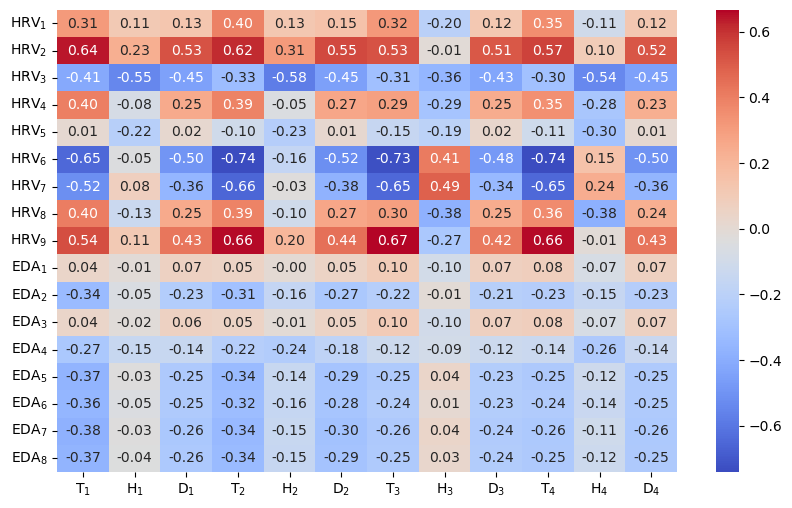

In [14]:
# Define the new column names with LaTeX subscript representation
new_column_names = {
    'Temp(C)_N1': 'T$_{1}$',
    'RH(%)_N1': 'H$_{1}$',
    'Dewpoint(C)_N1': 'D$_{1}$',
    'Temp(C)_N2': 'T$_{2}$',
    'RH(%)_N2': 'H$_{2}$',
    'Dewpoint(C)_N2': 'D$_{2}$',
    'Temp(C)_N3': 'T$_{3}$',
    'RH(%)_N3': 'H$_{3}$',
    'Dewpoint(C)_N3': 'D$_{3}$',
    'Temp(C)_N4': 'T$_{4}$',
    'RH(%)_N4': 'H$_{4}$',
    'Dewpoint(C)_N4': 'D$_{4}$',

    'hrv_vlf': 'HRV$_1$',
    'hrv_lf': 'HRV$_2$',
    'hrv_hf': 'HRV$_3$',
    'hrv_sdnn': 'HRV$_4$',
    'hrv_rmssd': 'HRV$_5$',
    'hrv_mean_nni': 'HRV$_6$',
    'hrv_median_nni': 'HRV$_7$',
    'hrv_range_nni': 'HRV$_8$',
    'hrv_entropy': 'HRV$_9$',

    'eda_tonic_mean': 'EDA$_1$',
    'eda_tonic_std': 'EDA$_2$',
    'eda_tonic_sum': 'EDA$_3$',
    'eda_tonic_energy': 'EDA$_4$',
    'eda_phasic_mean': 'EDA$_5$',
    'eda_phasic_std': 'EDA$_6$',
    'eda_phasic_sum': 'EDA$_7$',
    'eda_phasic_energy': 'EDA$_8$',

    # 'acc_acc_x_min': 'ACC$_1$',
    # 'acc_acc_y_min': 'ACC$_2$' ,
    # 'acc_acc_z_min': 'ACC$_3$', 
    # 'acc_l2_min': 'ACC$_4$',
    # 'acc_acc_x_max': 'ACC$_5$',
    # 'acc_acc_y_max': 'ACC$_6$', 
    # 'acc_acc_z_max': 'ACC$_7$', 
    # 'acc_l2_max': 'ACC$_8$',
    # 'acc_acc_x_ptp': 'ACC$_9$', 
    # 'acc_acc_y_ptp': 'ACC$_{10}$', 
    # 'acc_acc_z_ptp': 'ACC$_{11}$', 
    # 'acc_l2_ptp': 'ACC$_{12}$'
}

# Rename columns
correlation_phys_env_renamed = correlation_phys_env.rename(columns=new_column_names, index=new_column_names)

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Generate a heatmap of the correlation matrix
sns.heatmap(correlation_phys_env_renamed, annot=True, cmap='coolwarm', fmt=".2f")

# Add titles and labels
# plt.title('S06')
# plt.xlabel('environmental parameters', fontsize=14)
# plt.ylabel('physiological features', fontsize=14)

# Rotate the y-axis labels for better readability
plt.yticks(rotation=0)
plt.xticks(rotation=0)

# Save the plot as eps & png file
outpath = 'C:/Users/Tomar/dev/PCM_study/summer_2023/output/viz/'
plt.savefig(outpath+'S06_heatmap.eps', format='eps', bbox_inches='tight')
plt.savefig(outpath+'S06_heatmap.png', format='png', bbox_inches='tight')

# Show the plot
plt.show()


### Comfort function Implementation

In [15]:
# List of all physiological variables
physio_vars = ['hrv_vlf', 'hrv_lf', 'hrv_hf', 'hrv_sdnn', 'hrv_rmssd',
               'hrv_mean_nni', 'hrv_median_nni', 'hrv_range_nni', 'hrv_entropy',
               'eda_tonic_mean', 'eda_tonic_std', 'eda_tonic_sum', 'eda_tonic_energy',
               'eda_phasic_mean', 'eda_phasic_std', 'eda_phasic_sum', 'eda_phasic_energy']

# Environmental variables to consider
env_vars = ['Temp(C)_N1', 'RH(%)_N1']

# Compute Spearman correlations
correlations = S06_df[physio_vars + env_vars].corr(method='spearman')

# HRV and EDA groups for correlation
hrv_vars = physio_vars[:9]  # Assuming the first 9 are HRV related
eda_vars = physio_vars[9:]  # Assuming the rest are EDA related

# Identify one HRV and one EDA variable with the strongest correlation with any environmental variable
strongest_corr_hrv = correlations.loc[hrv_vars, env_vars].abs().max().idxmax()
strongest_corr_eda = correlations.loc[eda_vars, env_vars].abs().max().idxmax()

# Extract the specific HRV and EDA variable names with the highest correlation
strongest_corr_hrv_var = correlations.loc[hrv_vars, env_vars].abs().idxmax()[strongest_corr_hrv]
strongest_corr_eda_var = correlations.loc[eda_vars, env_vars].abs().idxmax()[strongest_corr_eda]

# Define thresholds using the identified variables and adjusted quartiles for environmental variables
thresholds = {
    strongest_corr_hrv_var: S06_df[strongest_corr_hrv_var].quantile(0.75),
    strongest_corr_eda_var: S06_df[strongest_corr_eda_var].quantile(0.25),
    'Temp(C)_N1': [S06_df['Temp(C)_N1'].quantile(0.30), S06_df['Temp(C)_N1'].quantile(0.65)],
    'RH(%)_N1': [S06_df['RH(%)_N1'].quantile(0.30), S06_df['RH(%)_N1'].quantile(0.65)]
}

# Define the comfort function
def comfort_label(row):
    comfort = (row[strongest_corr_hrv_var] >= thresholds[strongest_corr_hrv_var] and
               row[strongest_corr_eda_var] <= thresholds[strongest_corr_eda_var] and
               thresholds['Temp(C)_N1'][0] <= row['Temp(C)_N1'] <= thresholds['Temp(C)_N1'][1] and
               thresholds['RH(%)_N1'][0] <= row['RH(%)_N1'] <= thresholds['RH(%)_N1'][1])
    
    if comfort:
        return 1
    
    discomfort = (row[strongest_corr_hrv_var] < thresholds[strongest_corr_hrv_var] and
                  row[strongest_corr_eda_var] > thresholds[strongest_corr_eda_var] and
                  not (thresholds['Temp(C)_N1'][0] <= row['Temp(C)_N1'] <= thresholds['Temp(C)_N1'][1]) or
                  not (thresholds['RH(%)_N1'][0] <= row['RH(%)_N1'] <= thresholds['RH(%)_N1'][1]))
    
    if discomfort:
        return 0
    
    return 0.5  # Sensible label for ambiguous cases

# Apply the comfort function and count labels
S06_df['lambda'] = S06_df.apply(comfort_label, axis=1)
label_counts = S06_df['lambda'].value_counts(normalize=True) * 100

# Print the names of variables used for the comfort function
print("Variables considered for the comfort function:")
print(f"HRV Variable: {strongest_corr_hrv_var}")
print(f"EDA Variable: {strongest_corr_eda_var}")
print("Environmental Variables: Temp(C)_N1, RH(%)_N1")

# Print the percentage of labeled values
print("Label Distribution (%):")
print(label_counts)

print("saving data files as pkl")
savepath = 'C:/Users/Tomar/dev/PCM_study/summer_2023/output/final_data/data_S06.pkl'
S06_df.to_pickle(savepath)

Variables considered for the comfort function:
HRV Variable: hrv_mean_nni
EDA Variable: eda_phasic_sum
Environmental Variables: Temp(C)_N1, RH(%)_N1
Label Distribution (%):
lambda
0.0    58.060681
0.5    41.939319
Name: proportion, dtype: float64
saving data files as pkl


C:\Users\Tomar\AppData\Local\Temp\ipykernel_28300\1971131083.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  S06_df['lambda'] = S06_df.apply(comfort_label, axis=1)


In [16]:
# Group by unique instances
instance_groups = S06_df.groupby('ID_instance')

# Calculate the level of comfort for each instance
comfort_levels = instance_groups['lambda'].mean()  # You can also use .median() or .mode() depending on your preference

# Print the comfort levels
print(comfort_levels)


ID_instance
S06_1    0.000000
S06_2    0.000000
S06_3    0.000000
S06_4    0.000000
S06_5    0.262326
S06_6    0.000000
S06_7    0.000000
S06_8    0.280285
Name: lambda, dtype: float64


### Weather Station Data (During Commuting):

In [19]:
import pandas as pd

# Load the weather data from the uploaded Excel file
file_path = 'C:/Users/Tomar/dev/datasets/weather_summer2023.xlsx'
weather_data = pd.read_excel(file_path)

# Display the first few rows of the weather data to understand its structure
weather_data.head()


,Data,Relative Humidity Min (%),Relative Humidity Ave (%),Relative Humidity Max (%),Relative Humidity StDev (%),Air Temperature Min ('C),Air Temperature Ave ('C),Air Temperature Max ('C),Air Temperature StDev ('C),Solar Radiation Min (W/m2),...,Wind direction PrevDir (>),Wind direction RisDir (>),Wind direction RisVel (m/s),Wind direction StdDevDir (>),Wind direction CalmPerc (%),Wind speed Min (m/s),Wind speed Ave (m/s),Wind speed Max (m/s),Wind speed StDev (m/s),Rainfall Tot (mm)
0,2023-07-01 00:00:00,99.40,99.41,99.42,0.0,15.50,15.60,15.69,0.0,0.0,...,298,290,1.0,53,6,0.0,1.3,3.0,0.6,0.0
1,2023-07-01 00:10:00,99.40,99.41,99.41,0.0,15.55,15.65,15.74,0.0,0.0,...,165,155,0.5,69,25,0.0,0.8,1.9,0.5,0.2
2,2023-07-01 00:20:00,99.40,99.41,99.42,0.0,15.60,15.67,15.74,0.0,0.0,...,296,296,0.8,29,29,0.0,0.7,1.5,0.5,0.0
3,2023-07-01 00:30:00,99.40,99.41,99.42,0.0,15.55,15.64,15.75,0.0,0.0,...,333,336,0.6,69,17,0.0,0.8,2.6,0.6,0.0
4,2023-07-01 00:40:00,99.39,99.40,99.40,0.0,15.46,15.51,15.58,0.0,0.0,...,327,324,1.6,20,3,0.0,1.6,2.6,0.6,0.0


In [20]:
# Define the commuting instance data
commuting_data = [
    {"ID_instance": "S06_1", "Start Time" : "2023-08-30 18:32:18", "End Time": "2023-08-30 18:46:59"},
    {"ID_instance": "S06_2", "Start Time" : "2023-08-30 19:59:51", "End Time": "2023-08-30 20:21:49"},
    {"ID_instance": "S06_3", "Start Time" : "2023-08-30 22:51:04", "End Time": "2023-08-30 22:57:43"},
    {"ID_instance": "S06_4", "Start Time" : "2023-09-01 11:17:07", "End Time": "2023-09-01 11:27:02"},
    {"ID_instance": "S06_5", "Start Time" : "2023-09-03 05:56:17", "End Time": "2023-09-03 08:44:57"},
    {"ID_instance": "S06_6", "Start Time" : "2023-09-03 16:48:52", "End Time": "2023-09-03 17:14:25"},
    {"ID_instance": "S06_7", "Start Time" : "2023-09-03 19:06:50", "End Time": "2023-09-03 19:19:32"},
    {"ID_instance": "S06_8", "Start Time" : "2023-09-04 06:25:54", "End Time": "2023-09-04 08:52:08"}

]

# Convert the commuting instance data to a DataFrame
commuting_df = pd.DataFrame(commuting_data)

# Convert the Start Time and End Time columns to datetime
commuting_df['Start Time'] = pd.to_datetime(commuting_df['Start Time'])
commuting_df['End Time'] = pd.to_datetime(commuting_df['End Time'])

# Display the commuting instance DataFrame
commuting_df.head()


,ID_instance,Start Time,End Time
0,S06_1,2023-08-30 18:32:18,2023-08-30 18:46:59
1,S06_2,2023-08-30 19:59:51,2023-08-30 20:21:49
2,S06_3,2023-08-30 22:51:04,2023-08-30 22:57:43
3,S06_4,2023-09-01 11:17:07,2023-09-01 11:27:02
4,S06_5,2023-09-03 05:56:17,2023-09-03 08:44:57


In [21]:
# Convert the Data column in weather data to datetime
weather_data['Data'] = pd.to_datetime(weather_data['Data'])

# Initialize an empty list to store the results
results = []

# Iterate over each commuting instance
for _, row in commuting_df.iterrows():
    # Filter the weather data within the date-time range of the commuting instance
    mask = (weather_data['Data'] >= row['Start Time']) & (weather_data['Data'] <= row['End Time'])
    filtered_data = weather_data[mask]
    
    # Calculate the average, min, and max for Air Temperature and Relative Humidity 
    min_temp = filtered_data['Air Temperature Min (\'C)'].min()
    max_temp = filtered_data['Air Temperature Max (\'C)'].max()
    avg_temp = filtered_data['Air Temperature Ave (\'C)'].mean()

    min_rh = filtered_data['Relative Humidity Min (%)'].min()
    max_rh = filtered_data['Relative Humidity Max (%)'].max()
    avg_rh = filtered_data['Relative Humidity Ave (%)'].mean()
    
    # min_sr = filtered_data['Solar Radiation Ave (W/m2)'].min()
    # max_sr = filtered_data['Solar Radiation Ave (W/m2)'].max()
    avg_sr = filtered_data['Solar Radiation Ave (W/m2)'].mean()

    # Append the results
    results.append({
        'ID_instance': row['ID_instance'],
        'Min_Air_Temperature': min_temp,
        'Max_Air_Temperature': max_temp,
        'Avg_Air_Temperature': avg_temp,
        'Min_Relative_Humidity': min_rh,
        'Max_Relative_Humidity': max_rh,
        'Avg_Relative_Humidity': avg_rh,
        'Avg_Solar_Radiation': avg_sr
    })

# Convert the results to a DataFrame
results_df = pd.DataFrame(results)

# Display the results
results_df


,ID_instance,Min_Air_Temperature,Max_Air_Temperature,Avg_Air_Temperature,Min_Relative_Humidity,Max_Relative_Humidity,Avg_Relative_Humidity,Avg_Solar_Radiation
0,S06_1,17.36,17.65,17.520000,98.43,99.28,99.060000,38.940000
1,S06_2,16.60,16.95,16.780000,99.29,99.32,99.303333,0.030000
2,S06_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,S06_4,22.09,23.60,22.730000,55.19,59.32,57.620000,838.210000
4,S06_5,16.33,21.42,18.373529,68.46,99.30,89.021765,97.825882
5,S06_6,30.10,30.56,30.306667,26.45,28.65,27.606667,392.456667
6,S06_7,27.19,27.46,27.340000,42.48,44.36,43.370000,30.100000
7,S06_8,19.58,23.31,20.935333,55.44,74.29,66.912667,132.513333


### Weather Station Data (Day of Commuting from 8am to 6pm):

In [22]:
import pandas as pd

# Load the data from the provided Excel file
file_path = 'C:/Users/Tomar/dev/datasets/weather_summer2023.xlsx'
data = pd.read_excel(file_path)

# Convert the 'Data' column to datetime format
data['Data'] = pd.to_datetime(data['Data'])

# Define the date ranges as given in the task
date_ranges = [
    ("2023-08-30 08:00:00", "2023-08-30 18:00:00"),
    ("2023-09-01 08:00:00", "2023-09-01 18:00:00"),
    ("2023-09-03 08:00:00", "2023-09-03 18:00:00"),
    ("2023-09-04 08:00:00", "2023-09-04 18:00:00")
    
]

# Initialize a list to store statistics for each day
daily_statistics = []

# Calculate statistics for each date range
for start, end in date_ranges:
    day_data = data[(data['Data'] >= start) & (data['Data'] <= end)]
    
    stats = {
        'Date Range': f'{start} to {end}',
        'Min_Air_Temperature': day_data["Air Temperature Min ('C)"].min(),
        'Max_Air_Temperature': day_data["Air Temperature Max ('C)"].max(),
        'Avg_Air_Temperature': day_data["Air Temperature Ave ('C)"].mean(),
        'Min_Relative_Humidity': day_data['Relative Humidity Min (%)'].min(),
        'Max_Relative_Humidity': day_data['Relative Humidity Max (%)'].max(),
        'Avg_Relative_Humidity': day_data['Relative Humidity Ave (%)'].mean(),
        'Avg_Solar_Radiation': day_data['Solar Radiation Ave (W/m2)'].mean()
    }
    
    daily_statistics.append(stats)

# Convert the results to a DataFrame for better readability
daily_statistics_df = pd.DataFrame(daily_statistics)
daily_statistics_df


,Date Range,Min_Air_Temperature,Max_Air_Temperature,Avg_Air_Temperature,Min_Relative_Humidity,Max_Relative_Humidity,Avg_Relative_Humidity,Avg_Solar_Radiation
0,2023-08-30 08:00:00 to 2023-08-30 18:00:00,14.28,21.25,18.125082,57.44,99.34,79.341475,319.863770
1,2023-09-01 08:00:00 to 2023-09-01 18:00:00,17.18,28.48,24.157049,26.41,91.37,49.174754,694.482623
2,2023-09-03 08:00:00 to 2023-09-03 18:00:00,19.86,31.84,27.646393,21.33,78.16,43.344098,642.090820
3,2023-09-04 08:00:00 to 2023-09-04 18:00:00,20.75,26.31,24.656393,24.83,69.19,39.664918,640.496230


### Living Lab (Day of Commuting from 8am to 6pm):

In [24]:
# Load the CSV file
file_path = 'C:/Users/Tomar/dev/PCM_study/summer_2023/output/living_lab/LL/LL_e.csv'
data = pd.read_csv(file_path)

# Ensure the correct renaming of the 'DateTime' column to 'Timestamp'
data.rename(columns={'DateTime': 'Timestamp'}, inplace=True)

# Convert the 'Timestamp' column to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Define the start and end times for each day
time_intervals = [
    ("2023-08-30 08:00:00", "2023-08-30 18:00:00"),
    ("2023-09-01 08:00:00", "2023-09-01 18:00:00"),
    ("2023-09-03 08:00:00", "2023-09-03 18:00:00"),
    ("2023-09-04 08:00:00", "2023-09-04 18:00:00")
    
]

# Convert string times to datetime
time_intervals = [(datetime.strptime(start, "%Y-%m-%d %H:%M:%S"), datetime.strptime(end, "%Y-%m-%d %H:%M:%S")) for start, end in time_intervals]

# Initialize a list to store results
results_list = []

# Process each time interval
for start, end in time_intervals:
    # Filter data based on time interval
    filtered_data = data[(data['Timestamp'] >= start) & (data['Timestamp'] <= end)]
    
    # Calculate required metrics
    result = {
        'Start_Time': start,
        'End_Time': end,
        'Min_Temp_Air': filtered_data['Temp_Air(C)'].min(),
        'Max_Temp_Air': filtered_data['Temp_Air(C)'].max(),
        'Avg_Temp_Air': filtered_data['Temp_Air(C)'].mean(),
        'Min_Temp_Globe': filtered_data['Temp_Globe(C)'].min(),
        'Max_Temp_Globe': filtered_data['Temp_Globe(C)'].max(),
        'Avg_Temp_Globe': filtered_data['Temp_Globe(C)'].mean(),
        'Min_Relative_Humidity': filtered_data['RH(%)'].min(),
        'Max_Relative_Humidity': filtered_data['RH(%)'].max(),
        'Mean_Relative_Humidity': filtered_data['RH(%)'].mean(),
    }
    
    # Append result to the list
    results_list.append(result)

# Create a DataFrame from the results list
results_df = pd.DataFrame(results_list)

# Display the results
results_df


,Start_Time,End_Time,Min_Temp_Air,Max_Temp_Air,Avg_Temp_Air,Min_Temp_Globe,Max_Temp_Globe,Avg_Temp_Globe,Min_Relative_Humidity,Max_Relative_Humidity,Mean_Relative_Humidity
0,2023-08-30 08:00:00,2023-08-30 18:00:00,25.1,25.3,25.202662,25.1,25.4,25.290516,55.2,56.0,55.535940
1,2023-09-01 08:00:00,2023-09-01 18:00:00,24.5,25.1,24.796173,24.6,25.2,24.928952,56.0,59.6,57.786522
2,2023-09-03 08:00:00,2023-09-03 18:00:00,23.8,24.2,24.094842,23.9,24.3,24.206156,57.5,59.1,58.218303
3,2023-09-04 08:00:00,2023-09-04 18:00:00,24.1,24.4,24.293012,24.2,24.5,24.390183,50.8,59.0,56.158569
